# 2.1 Какого музыканта Beatles я загадал или entropy reduction

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

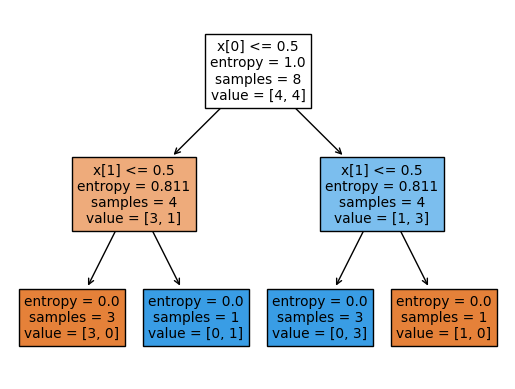

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# тестовы датафрейм
data = pd.DataFrame(
  {
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
  }
)

cls = tree.DecisionTreeClassifier(criterion='entropy')

X = data[['X_1', 'X_2']]
y = data.Y

# обучим наше дерево решений
learn_tree = cls.fit(X, y)

# отобразим визуализацию обучения
tree.plot_tree(learn_tree, filled=True)

## Шаг 6, задание
Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - отметьте все верные утверждения о данном датафрэйме

Ответ:
![image](image/2_2_6.jpg)

[Text(0.5, 0.75, 'Лазает по деревьям <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = собачка'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = котик'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = собачка')]

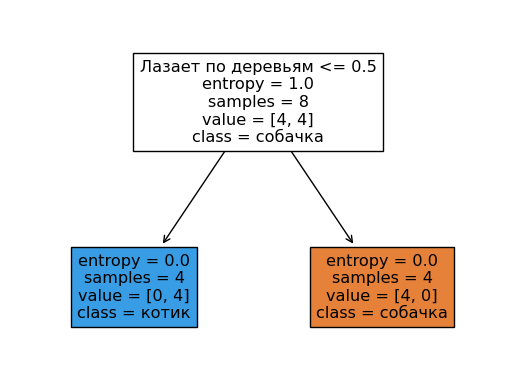

In [11]:
data_dogs = pd.read_csv('data/dogs.csv', index_col=0)
#data_dogs.info()

cls_dogs = tree.DecisionTreeClassifier(criterion='entropy')

fitches = data_dogs[['Гавкает' ,'Лазает по деревьям']]
animal_kind = data_dogs['Вид']

learn_tree = cls_dogs.fit(fitches, animal_kind)
tree.plot_tree(learn_tree, filled=True, class_names=['собачка', 'котик'], feature_names=list(fitches))

